In [44]:
import requests
import pandas as pd
from io import StringIO

# Carregando arquivo
url = "https://raw.githubusercontent.com/Ferraz0Felipe/PROJ-APLIC-I/main/Dados/Dados_alternadores_garantia.csv"

# Faz o download do arquivo CSV
response = requests.get(url)

# Verifica se o download foi bem-sucedido
if response.status_code == 200:

    # Lê o conteúdo do arquivo CSV usando o pandas
    csv_data = response.content.decode('utf-8')

    # Converte o conteúdo para um DataFrame do pandas
    df = pd.read_csv(StringIO(csv_data), sep=";")
    print(df.head())

else:
    print('Falha ao baixar o arquivo CSV.')

# Mostrar informações

linhas = csv_data.split("\n")

# Mostrar alguns gráficos com principais informações

  #Fazer gráfico de setores por modelo de carro


  Customer Customer Plant Vehicle Name             Sub Family Customer PN  \
0   Make A        Site PR        MD CC  Alternators NRG NRG12  9188098093   
1   Make A        Site BA        MD 3R    Alternators TG TG12  4488098073   
2   Make A        Site BA        MD PU    Alternators TG TG12  4258098073   
3   Make A        Site BA        MD 2R  Alternators NRG NRG12  9188098093   
4   Make A        Site PR        MD CC  Alternators NRG NRG12  9188098093   

  Spare or Original Engine Nr Production Date Inservice Date Repair Date  ...  \
0          Original       5EC      2021-12-08     2021-12-27  2023-02-23  ...   
1          Original       5EC      2021-06-24     2021-09-15  2023-07-24  ...   
2          Original       5EC      2022-05-10     2022-05-30  2023-07-03  ...   
3          Original       5EC      2022-10-14     2023-03-09  2023-08-02  ...   
4          Original       5EC      2021-08-27     2022-01-31  2023-04-05  ...   

  Upload Date    KMS  Repair Country    Climate Te

Analise dos Customer que mais realizam trocas

In [45]:
contagem_por_nome = df.groupby('Customer').size()
print(contagem_por_nome)

Customer
Make A      61
Make B     191
Make C     147
Make D    2712
dtype: int64


In [46]:
import matplotlib.pyplot as plt

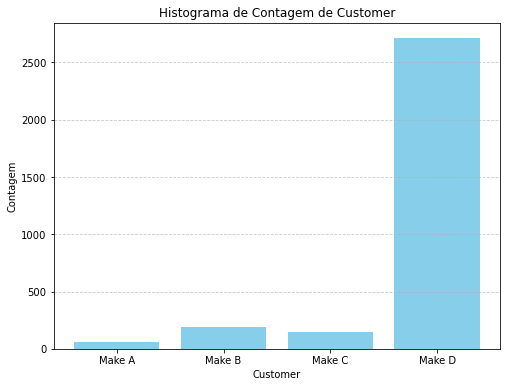

In [47]:
# Criando o histograma
plt.figure(figsize=(8, 6))
plt.bar(contagem_por_nome.index, contagem_por_nome.values, color='skyblue')
plt.xlabel('Customer')
plt.ylabel('Contagem')
plt.title('Histograma de Contagem de Customer')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Verificando Custumer Plant que mais realizam trocas em garantia

In [48]:
contagem_por_nome_plant = df.groupby('Customer Plant').size()
print(contagem_por_nome_plant)

Customer Plant
Site BA       36
Site CR       54
Site CR1     121
Site CR2      23
Site GR     1531
Site PC       38
Site PR       25
Site RO       92
Site SB       54
Site SC     1086
Site SFS       3
Site SL        3
Site TB       41
dtype: int64


Visualizando graficamente os que mais trocam peças em garantia

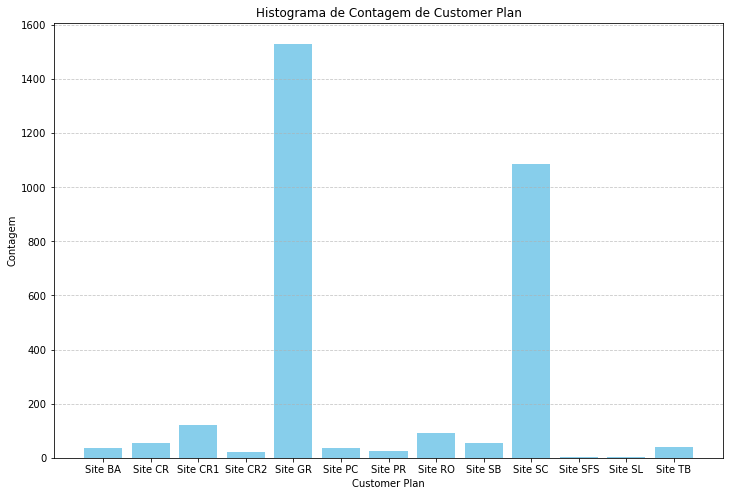

In [49]:
# Criando o histograma
plt.figure(figsize=(12, 8))
plt.bar(contagem_por_nome_plant.index, contagem_por_nome_plant.values, color='skyblue')
plt.xlabel('Customer Plan')
plt.ylabel('Contagem')
plt.title('Histograma de Contagem de Customer Plan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Destes que trocam qual o percentual dos custumer plant referente ao total de trocas realizadas

In [50]:
contagem_por_nome_plant = df.groupby('Customer Plant').size()

# Calcula o total de contagens
total_contagens = contagem_por_nome_plant.sum()

# Calcula a porcentagem para cada grupo e cria uma nova coluna 'Porcentagem'
contagem_por_nome_plant = contagem_por_nome_plant.to_frame(name='Contagem')
contagem_por_nome_plant['Porcentagem'] = ((contagem_por_nome_plant['Contagem'] / total_contagens) * 100).round(2)

# Mostra o resultado
print(contagem_por_nome_plant)

                Contagem  Porcentagem
Customer Plant                       
Site BA               36         1.16
Site CR               54         1.74
Site CR1             121         3.89
Site CR2              23         0.74
Site GR             1531        49.28
Site PC               38         1.22
Site PR               25         0.80
Site RO               92         2.96
Site SB               54         1.74
Site SC             1086        34.95
Site SFS               3         0.10
Site SL                3         0.10
Site TB               41         1.32


Analisando distribuição das trocas com relação a país e o percentual ao total de troca em garantia dos dois maiores para entender se está distribuido por país, para justificar o alto numero de troca aos mesmos

In [51]:
import pandas as pd

# Filtrar o DataFrame para incluir apenas 'Site GR' e 'Site SC'
filtro = df['Customer Plant'].isin(['Site GR', 'Site SC'])

# Aplicar o filtro e depois agrupar por 'Customer Plant' e 'Repair Country'
relacao_plant_country = df[filtro].groupby(['Customer Plant', 'Repair Country']).size().reset_index(name='Count')

# Calcular o total de contagens
total_contagens = relacao_plant_country['Count'].sum()

# Calcular a porcentagem para cada grupo e adicionar como uma nova coluna 'Percentage'
relacao_plant_country['Percentage'] = (relacao_plant_country['Count'] / total_contagens) * 100

# Arredondar as porcentagens para duas casas decimais
relacao_plant_country['Percentage'] = relacao_plant_country['Percentage'].round(2)

# Mostrar o resultado com a nova coluna 'Percentage'
print(relacao_plant_country)

   Customer Plant Repair Country  Count  Percentage
0         Site GR             AR      4        0.15
1         Site GR             BR   1365       52.16
2         Site GR             CL     21        0.80
3         Site GR             CO    118        4.51
4         Site GR             EC      7        0.27
5         Site GR             PE      1        0.04
6         Site GR             UY     15        0.57
7         Site SC             AR      9        0.34
8         Site SC             BR    983       37.56
9         Site SC             CL     16        0.61
10        Site SC             CO     32        1.22
11        Site SC             EC      2        0.08
12        Site SC             MX     39        1.49
13        Site SC             NI      1        0.04
14        Site SC             UY      4        0.15


Verificando o numero de trocas de peças originais ou de peças substituidas



In [52]:
contagem_original_reposição = df.groupby('Spare or Original').size()
print(contagem_original_reposição)

Spare or Original
Original    3106
Spare          5
dtype: int64


Visualizando graficamente

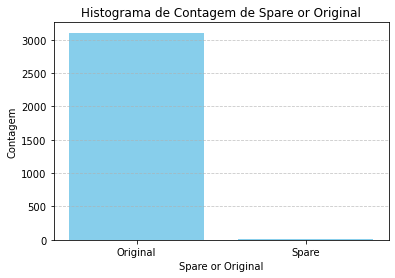

In [53]:
# Criando o histograma
plt.figure(figsize=(6, 4))
plt.bar(contagem_original_reposição.index, contagem_original_reposição.values, color='skyblue')
plt.xlabel('Spare or Original')
plt.ylabel('Contagem')
plt.title('Histograma de Contagem de Spare or Original')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Verificando o numero de trocas de peças originais ou de peças substituidas com os percentuais referentes ao total de trocas em garantia

In [54]:
# Realizar a contagem por categoria
contagem_original_reposição = df.groupby('Spare or Original').size().reset_index(name='Count')

# Calcular o total de contagens
total_contagens = contagem_original_reposição['Count'].sum()

# Calcular a porcentagem para cada categoria e adicionar como uma nova coluna 'Percentage'
contagem_original_reposição['Percentage'] = (contagem_original_reposição['Count'] / total_contagens) * 100

# Arredondar as porcentagens para duas casas decimais
contagem_original_reposição['Percentage'] = contagem_original_reposição['Percentage'].round(2)

# Mostrar o resultado com a nova coluna 'Percentage'
print(contagem_original_reposição)

  Spare or Original  Count  Percentage
0          Original   3106       99.84
1             Spare      5        0.16


Verificando quais países mais realizam trocas

In [55]:
contagem_pais = df.groupby('Repair Country').size()
print(contagem_pais)

Repair Country
AI       1
AR      51
BO       2
BR    2708
CI       2
CL      41
CO     182
EC      10
GT       1
MX      72
NC       2
NI       1
PE       6
PY       4
TN       1
UY      27
dtype: int64


Visualizando graficamente

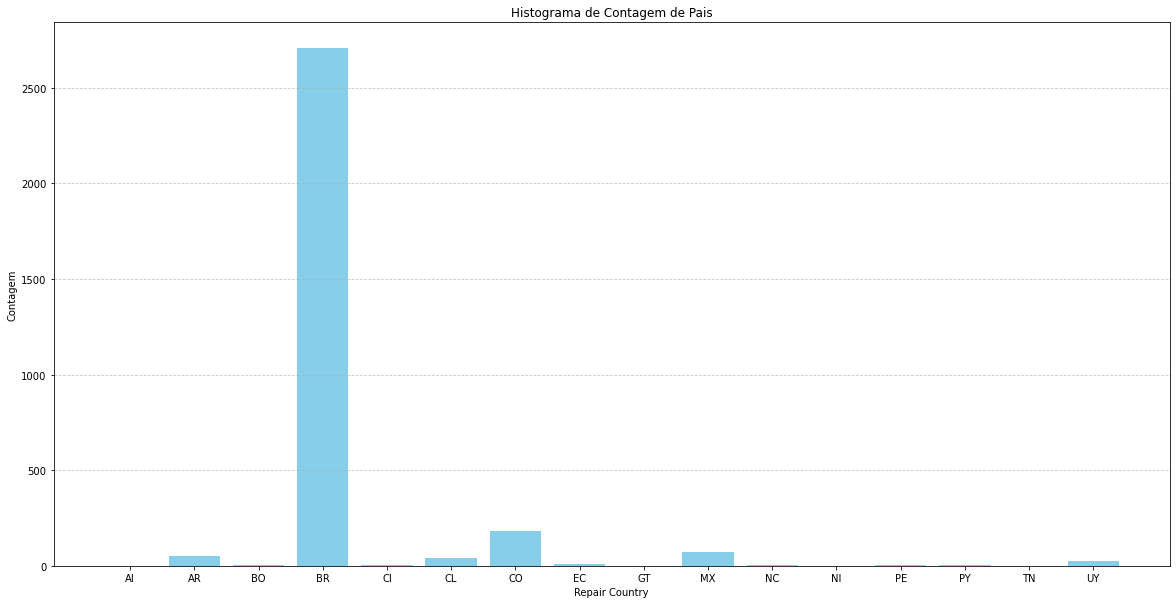

In [56]:
# Criando o histograma
plt.figure(figsize=(20, 10))
plt.bar(contagem_pais.index, contagem_pais.values, color='skyblue')
plt.xlabel('Repair Country')
plt.ylabel('Contagem')
plt.title('Histograma de Contagem de Pais')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Verificando a distribuição de trocas por mês e ano

In [57]:
import pandas as pd


df['Repair Date'] = pd.to_datetime(df['Repair Date'])

# Crie colunas adicionais para o mês e o ano
df['Month'] = df['Repair Date'].dt.month
df['Year'] = df['Repair Date'].dt.year

# Contagem de registros por mês e ano
contagem_por_mes_ano = df.groupby(['Year', 'Month']).size()

# Exiba o resultado
print(contagem_por_mes_ano)


Year  Month
2023  2        224
      3        303
      4        233
      5        256
      6        245
      7        280
      8        266
      9        225
      10       251
      11       268
      12       268
2024  1        268
      2         24
dtype: int64


Visualizando graficamente Evolução 2023

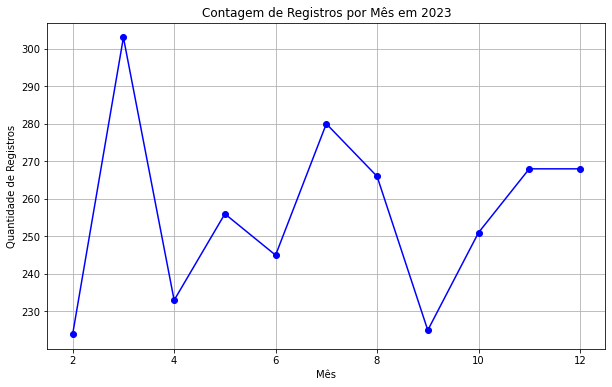

In [58]:
import matplotlib.pyplot as plt

# Filtrando os dados apenas para o ano de 2023
df_2023 = df[df['Year'] == 2023]

# Contagem de registros por mês em 2023
contagem_por_mes_2023 = df_2023.groupby('Month').size()

# Criando o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(contagem_por_mes_2023.index, contagem_por_mes_2023.values, marker='o', color='b')
plt.title('Contagem de Registros por Mês em 2023')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Registros')
plt.grid(True)

# Exibindo o gráfico
plt.show()

Visualizando graficamente a Contagem dos Registros 2023

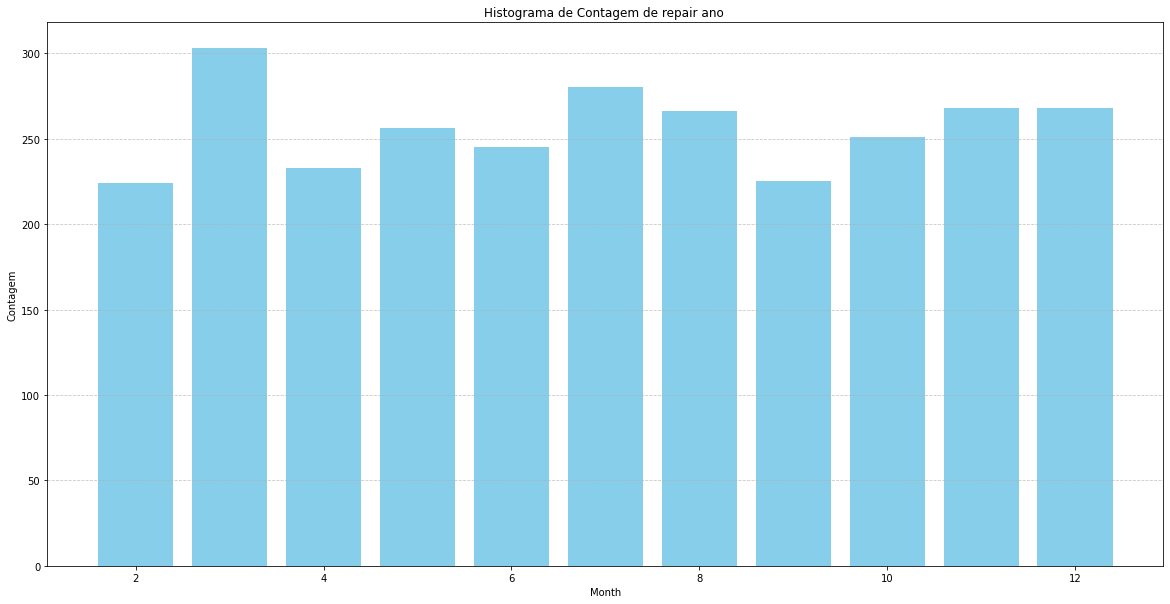

In [59]:
# Criando o histograma
plt.figure(figsize=(20, 10))
plt.bar(contagem_por_mes_2023.index, contagem_por_mes_2023.values, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Contagem')
plt.title('Histograma de Contagem de repair ano ')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Visualizando graficamente Evolução 2023/2024

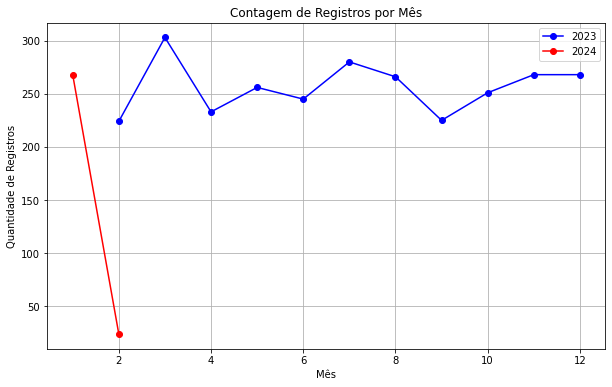

In [60]:
import matplotlib.pyplot as plt

# Filtrando os dados apenas para o ano de 2023
df_2023 = df[df['Year'] == 2023]

# Contagem de registros por mês em 2023
contagem_por_mes_2023 = df_2023.groupby('Month').size()

# Filtrando os dados apenas para o ano de 2024
df_2024 = df[df['Year'] == 2024]

# Contagem de registros por mês em 2024
contagem_por_mes_2024 = df_2024.groupby('Month').size()

# Criando o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(contagem_por_mes_2023.index, contagem_por_mes_2023.values, marker='o', color='b', label='2023')
plt.plot(contagem_por_mes_2024.index, contagem_por_mes_2024.values, marker='o', color='r', label='2024')
plt.title('Contagem de Registros por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Registros')
plt.grid(True)
plt.legend()  # Adiciona a legenda com os anos

# Exibindo o gráfico
plt.show()


Visualizando graficamente a Contagem dos Registros 2023/2024

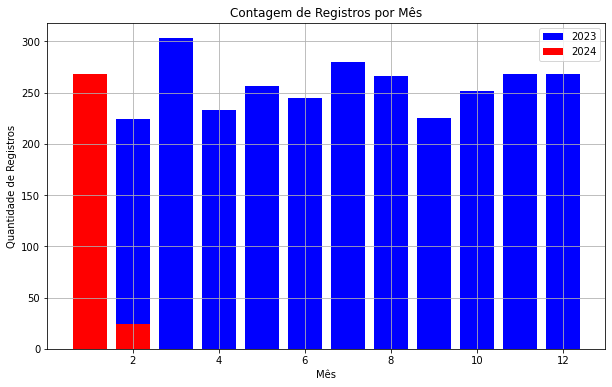

In [61]:
import matplotlib.pyplot as plt

# Suponha que você já tenha os dados em um DataFrame chamado 'df'
# Certifique-se de que ele contenha colunas 'Year' e 'Month'

# Filtrando os dados apenas para o ano de 2023
df_2023 = df[df['Year'] == 2023]

# Contagem de registros por mês em 2023
contagem_por_mes_2023 = df_2023.groupby('Month').size()

# Filtrando os dados apenas para o ano de 2024
df_2024 = df[df['Year'] == 2024]

# Contagem de registros por mês em 2024
contagem_por_mes_2024 = df_2024.groupby('Month').size()

# Criando o histograma de barras
plt.figure(figsize=(10, 6))
plt.bar(contagem_por_mes_2023.index, contagem_por_mes_2023.values, color='b', label='2023')
plt.bar(contagem_por_mes_2024.index, contagem_por_mes_2024.values, color='r', label='2024')
plt.title('Contagem de Registros por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Registros')
plt.grid(True)
plt.legend()  # Adiciona a legenda com os anos

# Exibindo o gráfico
plt.show()


Verificação de quantos registros foram considerados para confirmação de carregamento de toda a list no df

In [62]:
print('ultima linha:\n'+linhas[3111])

ultima linha:
Make D;Site GR;MD OH;Alternators NRG NRG12;78875549;Original;GL4;2021-12-17;2021-12-23;2024-01-12;2024-01-16;2024-02-22;20600;BR;Tropical;1;150,1755192;51,189894;98,9856252;25;10025


Gráfico para demonstra a distribuição de reparos por países no formato pizza

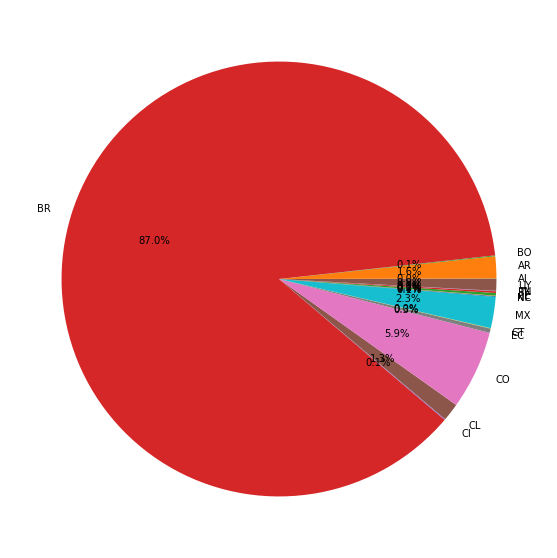

In [64]:
plt.figure(figsize=(20, 10))
plt.pie(contagem_pais,labels = contagem_pais.index, autopct='%1.1f%%')
plt.show()